# Atividade 3 - Transformada de Fourier

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from calcula_coeficientes import calcula_coeficientes

omega = np.linspace(0, 40, 1_000)
omega_c = 10
w_c = r'$\omega_c$'

In [2]:
config = {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.edgecolor': '.4',
    'axes.labelcolor': '.0',
    'axes.titlesize': 'medium',
    'axes.labelsize': 'medium',
    'figure.autolayout': True,
    'figure.figsize': (6, 4),
    'font.size': 10.0,
    'grid.linestyle': '--',
    'legend.facecolor': '.9',
    'legend.frameon': True,
    'savefig.transparent': True,
    'text.color': '.0',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small'
}

plt.style.use([config])

## Filtro de Chebyshev

In [3]:
def filtroChebyshev(w, wc, n, e):
    Tn = calcula_coeficientes(w, wc, n)
    Habs = (1 + (e**2) * (Tn**2)) ** (-0.5)
    return Habs

Item a) Variar ordem do filtro

In [4]:
e = 0.2

Habs_1 = filtroChebyshev(omega, omega_c, 1, e)
Habs_2 = filtroChebyshev(omega, omega_c, 2, e)
Habs_3 = filtroChebyshev(omega, omega_c, 3, e)
Habs_4 = filtroChebyshev(omega, omega_c, 4, e)
Habs_5 = filtroChebyshev(omega, omega_c, 5, e)

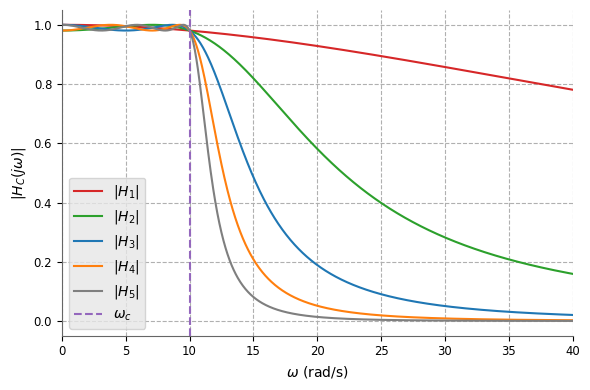

In [5]:
plt.plot(omega, Habs_1, color='tab:red', label=r'$|H_1|$')
plt.plot(omega, Habs_2, color='tab:green', label=r'$|H_2|$')
plt.plot(omega, Habs_3, color='tab:blue', label=r'$|H_3|$')
plt.plot(omega, Habs_4, color='tab:orange', label=r'$|H_4|$')
plt.plot(omega, Habs_5, color='tab:gray', label=r'$|H_5|$')
plt.axvline(omega_c, color='tab:purple', linestyle='--', label=w_c)
plt.xlabel(rf'$\omega$ (rad/s)')
plt.ylabel(r'$|H_C (j\omega)|$')
plt.xlim(0, 40)
plt.grid(True)
plt.legend()
plt.show()

Item b) Variar parâmetro 'e'

In [6]:
n = 3

Habs_01 = filtroChebyshev(omega, omega_c, n, 0.1)
Habs_03 = filtroChebyshev(omega, omega_c, n, 0.3)
Habs_05 = filtroChebyshev(omega, omega_c, n, 0.5)
Habs_07 = filtroChebyshev(omega, omega_c, n, 0.7)
Habs_09 = filtroChebyshev(omega, omega_c, n, 0.9)

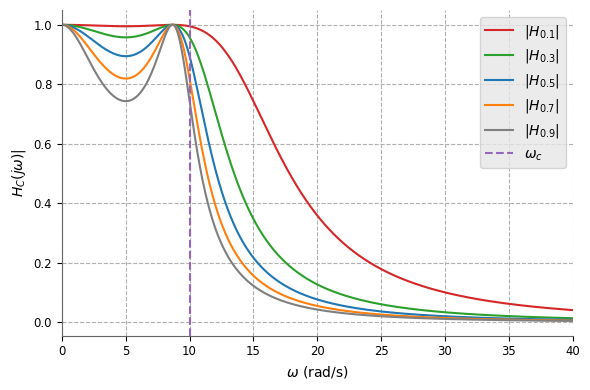

In [7]:
plt.plot(omega, Habs_01, color='tab:red', label=r'$|H_{0.1}|$')
plt.plot(omega, Habs_03, color='tab:green', label=r'$|H_{0.3}|$')
plt.plot(omega, Habs_05, color='tab:blue', label=r'$|H_{0.5}|$')
plt.plot(omega, Habs_07, color='tab:orange', label=r'$|H_{0.7}|$')
plt.plot(omega, Habs_09, color='tab:gray', label=r'$|H_{0.9}|$')
plt.axvline(x=omega_c, color='tab:purple', linestyle='--', label=w_c)
plt.xlabel(rf'$\omega$ (rad/s)')
plt.ylabel(r'$H_C (j\omega)|$')
plt.xlim(0, 40)
plt.grid(True)
plt.legend()
plt.show()

## Filtro de Butterworth

In [8]:
def filtroButterworth(w, wc, n):
    Habs = (1 + (w/wc) ** (2 * n)) ** (-0.5)
    return Habs

Item c) Variar ordem do filtro

In [9]:
Habs_1 = filtroButterworth(omega, omega_c, 1)
Habs_2 = filtroButterworth(omega, omega_c, 2)
Habs_3 = filtroButterworth(omega, omega_c, 3)
Habs_4 = filtroButterworth(omega, omega_c, 4)
Habs_5 = filtroButterworth(omega, omega_c, 5)

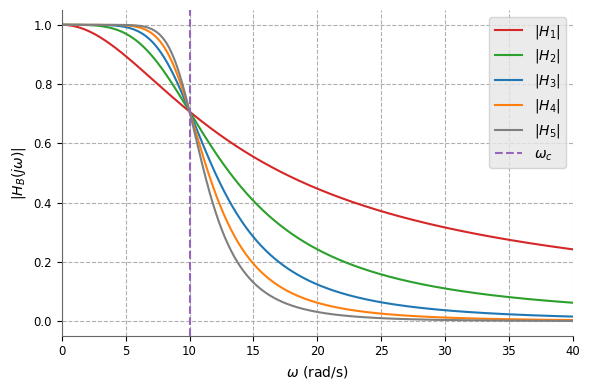

In [10]:
plt.plot(omega, Habs_1, color='tab:red', label=r'$|H_1|$')
plt.plot(omega, Habs_2, color='tab:green', label=r'$|H_2|$')
plt.plot(omega, Habs_3, color='tab:blue', label=r'$|H_3|$')
plt.plot(omega, Habs_4, color='tab:orange', label=r'$|H_4|$')
plt.plot(omega, Habs_5, color='tab:gray', label=r'$|H_5|$')
plt.axvline(x=omega_c, color='tab:purple', linestyle='--', label=w_c)
plt.xlabel(rf'$\omega$ (rad/s)')
plt.ylabel(r'$|H_B (j\omega)|$')
plt.xlim(0, 40)
plt.grid(True)
plt.legend()
plt.show()

## Filtragem de um pulso retangular

Item d) Calcular a transformada de x(t) e plotar o gráfico |X(jw)|

In [11]:
def Sa(x):
    return np.sinc(x/np.pi)

omega_m = 7.5
tau = 2 * np.pi / omega_m

# Magnitude da Transformada de Fourier de x(t)
Xabs = abs(tau * Sa(omega * tau/2))

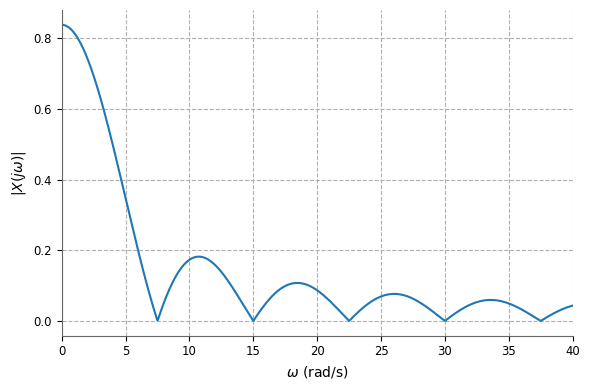

In [12]:
plt.plot(omega, Xabs)
plt.xlabel(rf'$\omega$ (rad/s)')
plt.ylabel(r'$|X(j\omega)|$')
plt.xlim(0, 40)
plt.grid(True)
plt.show()

Item e) Filtrar o sinal x(t) <=> X(jw) com os FPBs

In [13]:
# Módulos dos filtros
H_ideal = np.zeros_like(omega)
H_ideal[abs(omega) <= omega_c] = 1

H_C = filtroChebyshev(omega, omega_c, 4, 0.6)
H_B = filtroButterworth(omega, omega_c, 2)

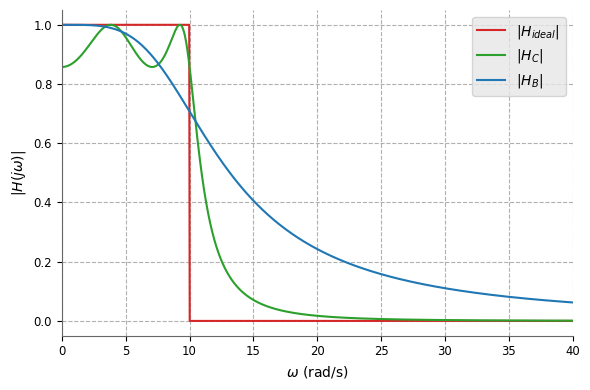

In [14]:
plt.plot(omega, H_ideal, color='tab:red', label=r'$|H_{ideal}|$')
plt.plot(omega, H_C, color='tab:green', label=r'$|H_C|$')
plt.plot(omega, H_B, color='tab:blue', label=r'$|H_B|$')
plt.xlabel(rf'$\omega$ (rad/s)')
plt.ylabel(r'$|H(j\omega)|$')
plt.xlim(0, 40)
plt.grid(True)
plt.legend()
plt.show()

In [15]:
# Módulos dos espectros obervados na saída dos filtros
Y_ideal = Xabs * H_ideal
Y_C = Xabs * H_C
Y_B = Xabs * H_B

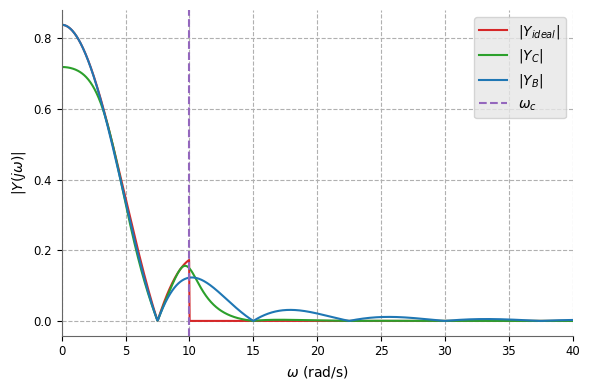

In [16]:
plt.plot(omega, Y_ideal, color='tab:red', label=r'$|Y_{ideal}|$')
plt.plot(omega, Y_C, color='tab:green', label=r'$|Y_C|$')
plt.plot(omega, Y_B, color='tab:blue', label=r'$|Y_B|$')
plt.axvline(x=omega_c, color='tab:purple', linestyle='--', label=w_c)
plt.xlabel(rf'$\omega$ (rad/s)')
plt.ylabel(r'$|Y(j\omega)|$')
plt.xlim(0, 40)
plt.grid(True)
plt.legend()
plt.show()